# Candidate Selection Strategy
## Author: Snigdhayan Mahanta

Consider a hypothetical situation, where a manager has to hire an employee for a vacant position. Among the pool of candidates there is an ideal candidate, who is the best fit for the position. Initially the manager only knows the total number $N$ of candidates, who have applied for the position and the objective is to identify the ideal candidate. 

For the sake of definiteness let us assume that the manager can assess candidates one by one and at the end of the assessment a decision about selection/rejection must be made immediately. This decision must be based solely on the manager's assessment of the candidate's suitability and the history of the assessment results of the previous candidates. A rejected candidate cannot be reconsidered for the position. A selection will conclude the hiring process and the rest of the candidate pool (if any) will not be assessed any further. What type of selection strategy should the manager deploy?

In this situation the only reasonable thing that the manager can do is to set a cuttoff value $M<N$ and assess $M$ candidates randomly without making a selection to gain some idea about the candidate pool. Starting from the $M+1$-st candidate the manager can select the one, who appears to be at least as good as the best candidate thus far. Observe that with this strategy it is certainly possible to miss the ideal candidate and select someone inferior or make no selection at all (e.g., if the ideal candidate already appears among the first $M$ candidates, who are rejected).

I have simulated and plotted the success rate in finding the ideal candidate via the above strategy for a fixed size of the candidate pool $N=60$ and letting the cutoff value $M$ vary between $1$ and $N-1$. The above problem is a reformulation of the `Secretary Problem` (https://en.wikipedia.org/wiki/Secretary_problem) and theoretically the optimum value of $M$ should be approximately $N/3$ (precisely $N/e$).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Class definition of 'Candidate'
class Candidate:
    '''
    A candidate has an id, a score and a selection status
    
    '''
    
    def __init__(self, cid: str, score: int, status: int) -> None:
        self.cid = cid # the candidate id
        self.score = score # the (unknown) score signifying the fit for the position
        self.status = status # 0 = rejected, 1 = selected (not used currently)

In [3]:
# Class definition of 'Selector'
class Selector:
    '''
    A selector keeps track of the best candidate thus far and the score thereof; 
    moreover, there is a match if a candidate is selected.
    
    '''
    
    def __init__(self, score: int, Candidate: Candidate, Match: Candidate) -> None:
        self.score = score # score of the best candidate thus far
        self.Candidate = Candidate # best candidate thus far
        self.Match = Match # the candidate, who is selected
    
    # method to simply assess a candidate to update the score without selection
    def assess_candidate(self, Candidate: Candidate) -> None:
        if ((self.score == None) or (self.score < Candidate.score)):
            self.score = Candidate.score
            self.Candidate = Candidate
            Candidate.status = 0
    
    # method to make the selection; returns true if a selection is made
    def select_match(self, Candidate: Candidate) -> bool:
        if (self.score <= Candidate.score):
            self.score = Candidate.score
            self.Match = Candidate
            Candidate.status = 1
            return True
        else:
            Candidate.status = 0
            return False

In [4]:
# Define function to simulate the selection strategy

def run_simulation(n_candidates: int, cutoff: int) -> bool:
    New_selector = Selector(None, None, None)
    Candidates = []
    Ideal_Candidate = None # the candidate with the highest score

    # create a pool of potential candidates and identify the ideal candidate
    for i in range(1, n_candidates+1):
        cid = "Candidate"+str(i)
        score = np.random.choice(a=range(10, 1000)) 
        status = None
        New_candidate = Candidate(cid, score, status)
        Candidates.append(New_candidate)
        if ((Ideal_Candidate == None) or (Ideal_Candidate.score < New_candidate.score)):
            Ideal_Candidate = New_candidate
    Ideal_Candidate.score += 1 # make the ideal candidate unique
    
    # execute the selection strategy
    for j in range(n_candidates):
        Test_candidate = Candidates[j]

        if (j <= cutoff):
            New_selector.assess_candidate(Test_candidate)
            
        else:
            result = New_selector.select_match(Test_candidate)
            
            # return true if the ideal candidate is found
            if (result == True): 
                return New_selector.Match.cid == Ideal_Candidate.cid 

In [5]:
# Define function to assess the performance of each cutoff value
def cutoff_performance(n_simulations: int, n_candidates: int, cutoff:int) -> float:
    n_success = 0
    for i in range(n_simulations):
        if (run_simulation(n_candidates, cutoff) == True):
            n_success += 1
            
    return (n_success/n_simulations)*100 # success rate

In [6]:
# Experiment parameters
n_simulations = 100 # the number of trials to compute the success rate
n_candidates = 60 # the size of the candidate pool

In [7]:
# Conduct experiment and gather results
performance = np.zeros(n_candidates-2)

for i in range(1, n_candidates-1):
    performance[i-1] = cutoff_performance(n_simulations, n_candidates, i)

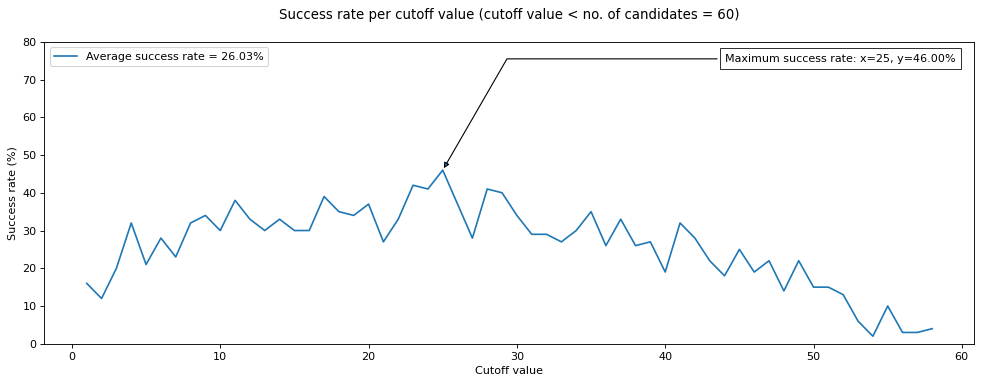

In [8]:
# Plot the success rate according to cutoff value; also compute the average and maximum values

# x-axis values 
x = range(1, n_candidates-1)
# y-axis values
y =  performance
average = sum(y)/len(y)

# Plot curve
plt.figure(figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.ylim(top=80)
plt.plot(x, y)

# x-axis name
plt.xlabel(F'Cutoff value')

# y-axis name
plt.ylabel(F'Success rate (%)')

# Title and legends
plt.title(F'Success rate per cutoff value (cutoff value < no. of candidates = {n_candidates})\n')

legends = [F'Average success rate = {round(average, 2)}%']
plt.legend(legends, loc='upper left')

def annotate_max(x, y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "Maximum success rate: x={:.0f}, y={:.2f}%".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square, pad=0.5", fc="w", ec="k", lw=0.72)
    arrowprops = dict(arrowstyle="-|>", connectionstyle="angle, angleA=0, angleB=60")
    kw = dict(xycoords='data', 
              textcoords="axes fraction",
              arrowprops=arrowprops, 
              bbox=bbox_props, 
              ha="right", 
              va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.98, 0.96), **kw)

annotate_max(x, y)

plt.show()